In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score,KFold
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier

In [27]:
df = pd.read_csv(r"D:\Desktop\Dataset\BRCA Data.csv")
df.head(3)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [29]:
df.isnull().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [30]:
df.dropna(inplace=True)

In [31]:
for i in df.iloc[:,2:]:
    status = df[i].value_counts()
    fig = px.pie(values= status.values, names= status.index, hole= 0.5,title= i, width= 700,height= 400)
    fig.show()
    

In [32]:
df.drop(['Patient_ID','ER status', 'PR status', 'Date_of_Surgery', 'Date_of_Last_Visit'],axis=1,inplace= True)
df.head(3)

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive


In [33]:
ran = RandomOverSampler()
X,Y = ran.fit_resample(df.iloc[:,:-1],df['Patient_Status'])

In [34]:
X.shape

(510, 10)

In [35]:
status = Y.value_counts()
fig = px.pie(values= status.values, names= status.index, hole= 0.5,title= i, width= 700,height= 400)
fig.show()
print(Y.value_counts())

Patient_Status
Alive    255
Dead     255
Name: count, dtype: int64


In [36]:
df.isnull().sum()

Age               0
Gender            0
Protein1          0
Protein2          0
Protein3          0
Protein4          0
Tumour_Stage      0
Histology         0
HER2 status       0
Surgery_type      0
Patient_Status    0
dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [38]:
# trf1 = ColumnTransformer([('ohe', OneHotEncoder(drop='first',handle_unknown='ignore'),[1,7,8,9]),
#                           ('ord',OneHotEncoder(categories=[['I','II','III']]),[6])],remainder='passthrough')
# trf2 = ColumnTransformer([('scaling',StandardScaler(),[0,2,3,4,5,6])],remainder='passthrough')
# trf3 = DecisionTreeClassifier(criterion='entropy',max_depth = 18, splitter = 'best')

In [39]:
lab = LabelEncoder()
y_train_enc = lab.fit_transform(y_train)
y_test_enc = lab.fit_transform(y_test)

In [40]:
lab.classes_

array(['Alive', 'Dead'], dtype=object)

In [41]:
# pipe = Pipeline([
#     ('trf1',trf1),
#     ('trf2',trf2),
#     ('trf3',trf3)
# ])

In [64]:
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), [1,7,8,9]),
        ('ord', OneHotEncoder(categories=[['I','II','III']], handle_unknown='ignore'), [6]),
        ('scaler', StandardScaler(), [0,2,3,4,5]) 
    ],
    remainder='passthrough'
)
dt_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', DecisionTreeClassifier(
        criterion='entropy',
        max_depth=18,splitter='best'
    ))
])

from sklearn.ensemble import ExtraTreesClassifier
extra_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', ExtraTreesClassifier(
        criterion = 'entropy',max_depth = 16,max_features = 'sqrt'
    ))
])

from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', RandomForestClassifier())
])

from sklearn.svm import SVC

svm_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', SVC(C=1,kernel='rbf',gamma=1))
])

from sklearn.neighbors import KNeighborsClassifier

knf_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', KNeighborsClassifier(metric= 'manhattan',n_neighbors= 3, weights= 'distance'))
])
import xgboost as xgb

xgb_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model',xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42,colsample_bytree = 0.7,learning_rate = 0.1,max_depth = 5,
                        n_estimators = 200,subsample = 0.7))
])
models = {
    'Decision Tree__': dt_pipeline,
    'ExtraClassifier': extra_pipeline,
    'Random Forest__': rf_pipeline,
    'SVM____________': svm_pipeline,
    'KNF____________': knf_pipeline,
    'XGBoost________':xgb_pipeline
}

for name, pipe in models.items():

    cv_scores = cross_val_score(
        pipe,
        x_train,
        y_train_enc,
        cv=5,
        scoring='accuracy'
    )

    pipe.fit(x_train, y_train_enc)
    test_score = pipe.score(x_test, y_test_enc)

    print(
        f"{name} | "
        f"CV: {cv_scores.mean():.4f} ± {cv_scores.std():.4f} | "
        f"Test: {test_score:.4f}"
    )

    


Decision Tree__ | CV: 0.8113 ± 0.0505 | Test: 0.7549
ExtraClassifier | CV: 0.9044 ± 0.0146 | Test: 0.9706
Random Forest__ | CV: 0.8946 ± 0.0251 | Test: 0.9706
SVM____________ | CV: 0.9387 ± 0.0135 | Test: 0.9902
KNF____________ | CV: 0.7695 ± 0.0359 | Test: 0.7941
XGBoost________ | CV: 0.8652 ± 0.0083 | Test: 0.9020


In [58]:
# ======================================================
# 1. IMPORTS
# ======================================================

import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, learning_curve
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay,
    roc_auc_score
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb


# ======================================================
# 2. TARGET ENCODING
# ======================================================

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)


# ======================================================
# 3. PREPROCESSORS
# ======================================================

preprocessor_tree = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), [1,7,8,9]),
        ('ord', OneHotEncoder(categories=[['I','II','III']], handle_unknown='ignore'), [6])
    ],
    remainder='passthrough'
)

preprocessor_scaled = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), [1,7,8,9]),
        ('ord', OneHotEncoder(categories=[['I','II','III']], handle_unknown='ignore'), [6]),
        ('scaler', StandardScaler(), [0,2,3,4,5])
    ],
    remainder='passthrough'
)


# ======================================================
# 4. MODEL PIPELINES
# ======================================================

pipelines = {
    'Decision Tree': Pipeline([
        ('prep', preprocessor_tree),
        ('model', DecisionTreeClassifier(random_state=42))
    ]),

    'Random Forest': Pipeline([
        ('prep', preprocessor_tree),
        ('model', RandomForestClassifier(random_state=42))
    ]),

    'Extra Trees': Pipeline([
        ('prep', preprocessor_tree),
        ('model', ExtraTreesClassifier(random_state=42))
    ]),

    'XGBoost': Pipeline([
        ('prep', preprocessor_tree),
        ('model', xgb.XGBClassifier(
            objective='multi:softmax',
            num_class=3,
            eval_metric='mlogloss',
            random_state=42
        ))
    ]),

    'SVM': Pipeline([
        ('prep', preprocessor_scaled),
        ('model', SVC(kernel='rbf', gamma='scale', probability=True))
    ]),

    'KNN': Pipeline([
        ('prep', preprocessor_scaled),
        ('model', KNeighborsClassifier())
    ])
}


# ======================================================
# 5. HYPERPARAMETER GRIDS
# ======================================================

param_grids = {
    'Decision Tree': {
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10]
    },

    'Random Forest': {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [None, 10, 20],
        'model__max_features': ['sqrt', 'log2']
    },

    'Extra Trees': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20]
    },

    'XGBoost': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [3, 5, 7],
        'model__learning_rate': [0.01, 0.1],
        'model__subsample': [0.7, 1.0]
    },

    'SVM': {
        'model__C': [0.1, 1, 10],
        'model__gamma': ['scale', 'auto']
    },

    'KNN': {
        'model__n_neighbors': [3, 5, 7],
        'model__weights': ['uniform', 'distance']
    }
}


# ======================================================
# 6. HYPERPARAMETER TUNING + CV
# ======================================================

results = []
best_models = {}

for name in pipelines:

    search = RandomizedSearchCV(
        pipelines[name],
        param_grids[name],
        n_iter=10,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        random_state=42
    )

    search.fit(x_train, y_train_enc)

    best_models[name] = search.best_estimator_

    test_score = search.best_estimator_.score(x_test, y_test_enc)

    results.append([
        name,
        search.best_score_,
        test_score
    ])


# ======================================================
# 7. COMPARISON TABLE
# ======================================================

results_df = pd.DataFrame(
    results,
    columns=['Model', 'CV Accuracy', 'Test Accuracy']
).sort_values(by='Test Accuracy', ascending=False)

results_df


,Model,CV Accuracy,Test Accuracy
2,Extra Trees,0.909304,0.990196
1,Random Forest,0.914092,0.980392
3,XGBoost,0.852966,0.931373
0,Decision Tree,0.826107,0.882353
4,SVM,0.786661,0.862745
5,KNN,0.767028,0.774510


              precision    recall  f1-score   support

       Alive       1.00      0.98      0.99        53
        Dead       0.98      1.00      0.99        49

    accuracy                           0.99       102
   macro avg       0.99      0.99      0.99       102
weighted avg       0.99      0.99      0.99       102



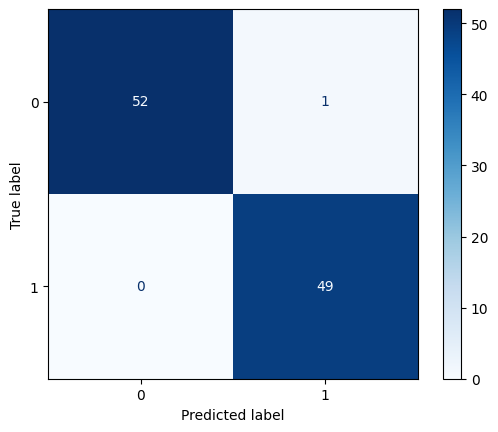

In [59]:
best_name = results_df.iloc[0]['Model']
best_model = best_models[best_name]

y_pred = best_model.predict(x_test)

print(classification_report(y_test_enc, y_pred, target_names=le.classes_))

ConfusionMatrixDisplay.from_predictions(
    y_test_enc, y_pred, cmap='Blues'
)
plt.show()


In [63]:
y_proba = best_model.predict_proba(x_test)
roc_auc = roc_auc_score(y_test_enc, y_proba, multi_class='ovr')
roc_auc


ValueError: y should be a 1d array, got an array of shape (102, 2) instead.

In [61]:
if hasattr(best_model.named_steps['model'], 'feature_importances_'):

    feature_names = best_model.named_steps['prep'].get_feature_names_out()
    importances = best_model.named_steps['model'].feature_importances_

    fi = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    fi.head(15)


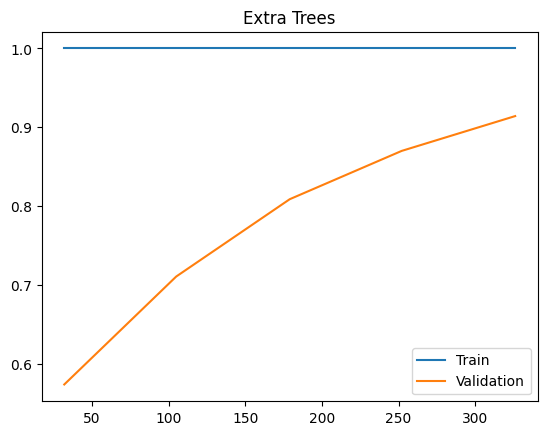

In [62]:
train_sizes, train_scores, val_scores = learning_curve(
    best_model,
    x_train,
    y_train_enc,
    cv=5,
    scoring='accuracy'
)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Train')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation')
plt.legend()
plt.title(best_name)
plt.show()


In [ ]:
 git config --global user.email "sazol4747@gmail.com"
  git config --global user.name "sazol07"